## First let's start by importing the required libraries

In [286]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Now let's import the dataset into a pandas dataframe

In [287]:
df=pd.read_csv("churn.csv")

In [288]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [289]:
# Checking the shape of dataset
df.shape

(7043, 21)

In [290]:
# Checking the missing or null values for each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [291]:
# Checking datatypes of the variables in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [292]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [293]:
# Dropping the customerID column because it will be unique for each customer so it wont be having any effect on dependent variable
df=df.drop("customerID",axis=1)

## Basic EDA of the Dataset

<AxesSubplot:xlabel='Churn', ylabel='count'>

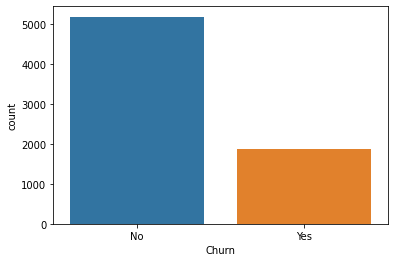

In [294]:
# Visualize the count of customer churn
sns.countplot(df["Churn"])

In [295]:
# To see the percentage of customers that are leaving
retained_customer_count=df[df.Churn == "No"].shape[0]
churned_customer_count=df[df.Churn == "Yes"].shape[0]

retained_customer_percentage=retained_customer_count/df["Churn"].count() * 100
churned_customer_percentage=churned_customer_count/df["Churn"].count() * 100

print("The percentage of customers retained is ",round(retained_customer_percentage,3),"%")
print("The percentage of customers churned is ",round(churned_customer_percentage,3),"%")

The percentage of customers retained is  73.463 %
The percentage of customers churned is  26.537 %


## Convert all the non-numeric columns to numeric

In [296]:
for i in df.columns:
    if df[i].dtype != np.number:
        df[i]=LabelEncoder().fit_transform(df[i])
        

In [297]:
# Displaying datatypes after using label encoder
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [298]:
mn=MinMaxScaler()
sc_array=mn.fit_transform(df)
df_sc=pd.DataFrame(sc_array,index=df.index,columns=df.columns)

In [299]:
df_sc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654,1.0


## Defining x and y variables for training and testing data split

In [300]:
x=df_sc.drop("Churn",axis=1)
y=df_sc["Churn"]

## Splitting the data into training and testing data

In [301]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=550)

## Now using Logistic Regression for creating the training model

In [302]:
lr=LogisticRegression(C=300)

In [303]:
lr.fit(x_train,y_train)

LogisticRegression(C=300, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the data

In [304]:
pred=lr.predict(x_test)

## Checking the metrics of the model

In [310]:
print("The accuracy of the model is ",round(accuracy_score(y_test,pred)*100,3),"%")

The accuracy of the model is  81.405 %


In [ ]:
As the accuracy is above 80

## Checking if the model is overfitting

In [314]:
print("The accuracy of the model for checking if its overfitting or not is ",round(accuracy_score(y_train,lr.predict(x_train))*100,3),"%")

The accuracy of the model for checking if its overfitting or not is  80.387 %
